In [1]:
articles = open('article.txt', 'r')

In [2]:
d = articles.readlines()

In [3]:
import numpy as np
dictionary = []
large_corpus = []
for _ in d:
    c = []
    a = _.split()
    for __ in a:
        if a == '|':
            continue
        c.append(__)
    large_corpus.append(c)

In [4]:
print(len(large_corpus))

1041


In [5]:
import gensim.models.word2vec as w2v
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import multiprocessing

In [6]:
num_features = 100
min_word_count = 3
num_workers = multiprocessing.cpu_count()
context_size = 7
downsampling = 1e-3
seed =1

In [7]:
nepali2vec = w2v.Word2Vec(
    large_corpus,
    size = 150,
    window = 5,
    min_count = 2,
    workers = num_workers
)

In [8]:
nepali2vec.train(large_corpus, total_examples=len(large_corpus), epochs=10)

(2260369, 2610800)

In [9]:
len(nepali2vec.wv.vocab)

15605

In [10]:
nepali2vec.wv.most_similar(positive='प्रधानमन्त्री')

[('शेरबहादुर', 0.958017110824585),
 ('देउवाले', 0.949184238910675),
 ('देउवा', 0.9269540309906006),
 ('देउवाजीलाई', 0.8459380269050598),
 ('मोदीसँग', 0.8416039943695068),
 ('प्रचण्डलाई', 0.8348464965820312),
 ('देउवाको', 0.8269163370132446),
 ('टरिजा', 0.8256911635398865),
 ('छन्प्रधानमन्त्री', 0.8252043724060059),
 ('प्रचण्डजीले', 0.8232799768447876)]

In [11]:
import sklearn.manifold

In [12]:
tsne = sklearn.manifold.TSNE(n_components = 2, random_state = 0)

In [13]:
all_word_vector_matrix = nepali2vec.wv.vectors

In [14]:
nepali2vec.wv.index2word[1:100]

['छ',
 'पनि',
 'भएको',
 'भने',
 'गरेको',
 'गर्ने',
 'गर्न',
 'निर्वाचन',
 'लागि',
 'हुने',
 'रहेको',
 'गरेका',
 'छन्',
 'तथा',
 'मा',
 'नै',
 'हो',
 'नेपाली',
 'को',
 'उक्त',
 'एक',
 'प्रदेश',
 'काम',
 'बताएका',
 'स्थानीय',
 'गरिएको',
 'भएका',
 'प्रमुख',
 'अनुसार',
 'भन्ने',
 'रुपमा',
 'भन्दै',
 'थियो',
 'आयोगले',
 'हुन',
 'आफ्नो',
 'गर्दै',
 'यो',
 'तर',
 'नेपाल',
 'गरी',
 'केही',
 'नेता',
 'त्यो',
 'जनाएको',
 'समेत',
 'उनले',
 'निर्णय',
 'सरकारले',
 'दुई',
 'राष्ट्रिय',
 'थिए',
 'व्यवस्था',
 'अध्यक्ष',
 'रहेका',
 'प्रहरी',
 'कुनै',
 'सबै',
 'बताइएको',
 'कुरा',
 'सुरक्षा',
 'माओवादी',
 'पार्टी',
 'नयाँ',
 'एउटा',
 'आएको',
 'अब',
 'बढी',
 'वा',
 'प्रधानमन्त्री',
 'का',
 'चुनाव',
 'कारण',
 'दिएको',
 'पहिलो',
 'गरेर',
 'उत्तर',
 'राष्ट्रपति',
 'दिन',
 'हामी',
 'प्रवक्ता',
 'हामीले',
 'हजार',
 'एमाले',
 'राजनीतिक',
 'क्षेत्र',
 'छलफल',
 'समय',
 'सदस्य',
 'मत',
 'पर्ने',
 'जारी',
 'नेकपा',
 'सभा',
 'जना',
 'मात्र',
 'धेरै',
 'सरकार',
 'भन्दा']

In [15]:
all_word_vector_matrix_2d = tsne.fit_transform(all_word_vector_matrix)

In [16]:
sns.set_context('poster')
import pandas as pd

In [17]:
all_word_vector_matrix_2d[100]

array([-65.690475, -30.959297], dtype=float32)

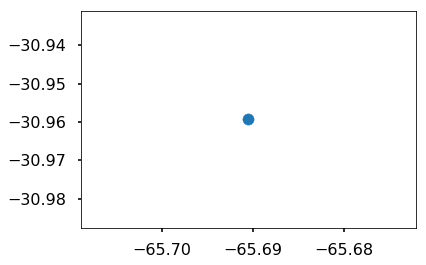

In [18]:
plt.scatter(all_word_vector_matrix_2d[100][0], all_word_vector_matrix_2d[100][1])
plt.show()

In [36]:
def plot(embeddings,labels):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings!'
    for  i , label in enumerate(labels):
        x,y = embeddings[i,:]
        plt.scatter(x,y, s=2)
        plt.annotate(label, xy=(x,y), xytext=(8,5), textcoords='offset points',ha='right',va='bottom')

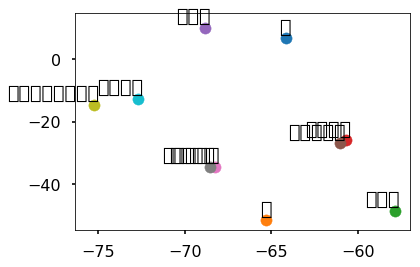

In [20]:
plot(all_word_vector_matrix_2d[0:10], nepali2vec.wv.index2word[0:10])
plt.show()

In [32]:
from __future__ import unicode_literals
index2word = []
import matplotlib
matplotlib.rcParams['font.family'] = "Noto Serif Devanagari"

<IPython.core.display.Javascript object>


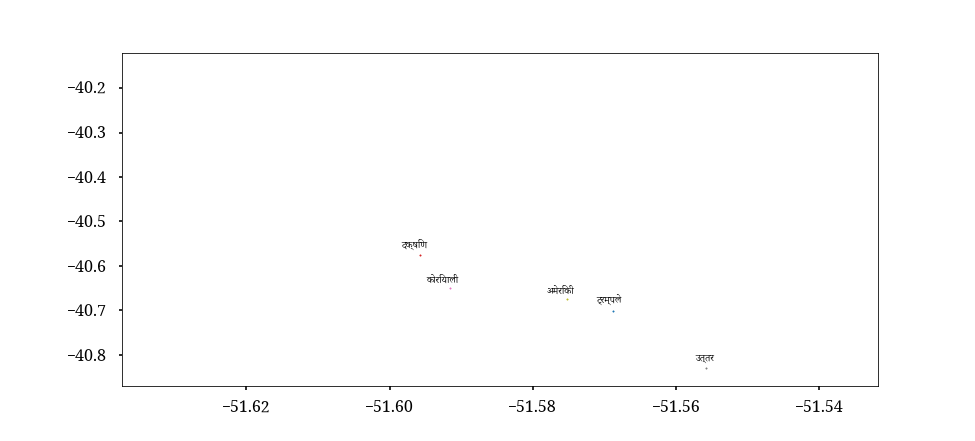

In [37]:
%matplotlib notebook
plot(all_word_vector_matrix_2d[0:1000], nepali2vec.wv.index2word[0:1000])
plt.show()

In [21]:
nepali2vec.wv.save('vect')

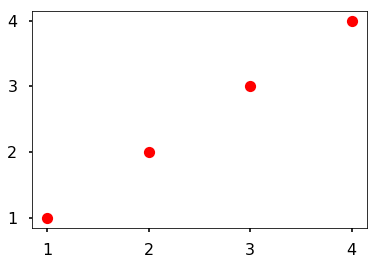

In [22]:
plt.plot([1,2,3,4],[1,2,3,4], 'ro')

In [47]:
import json
data = {}
for i,d in enumerate(all_word_vector_matrix_2d):
    data[nepali2vec.wv.index2word[i]] = all_word_vector_matrix_2d[i].tolist()

print(data['कुरा'])

[-61.868343353271484, -51.748958587646484]


In [49]:
with open('data.json', 'w') as js:
    json.dump(data, js)